In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score




In [2]:
# Set the directory for the test dataset
test_data_path = 'flower_species_classification/'


In [3]:

# Load the test dataset
X_test = np.load(test_data_path + 'data_test.npy').T  # Transpose the data
y_test = np.load(test_data_path + 'labels_test.npy')



In [4]:
# Normalize the test data (same as training data normalization)
X_test = X_test / 255.0

# Reshape the test data to (num_samples, 300, 300, 3)
X_test = X_test.reshape(-1, 300, 300, 3)



In [5]:
# Load the saved model
model = load_model('mobilenetv2_model.h5')  # Ensure this matches the saved model file

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels



13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step


In [6]:
# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Testing Accuracy: {test_accuracy:.4f}")



Testing Accuracy: 0.9253


In [7]:
# Optionally, print confusion matrix or classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87        48
         1.0       0.91      0.98      0.95        44
         2.0       0.82      0.80      0.81        46
         3.0       1.00      1.00      1.00        36
         4.0       0.97      0.84      0.90        45
         5.0       0.97      0.97      0.97        40
         6.0       0.98      0.98      0.98        43
         7.0       1.00      0.97      0.99        37
         8.0       0.97      0.97      0.97        32
         9.0       0.79      0.95      0.87        44

    accuracy                           0.93       415
   macro avg       0.93      0.93      0.93       415
weighted avg       0.93      0.93      0.93       415


Confusion Matrix:
[[40  0  0  0  0  0  0  0  0  8]
 [ 0 43  1  0  0  0  0  0  0  0]
 [ 2  3 37  0  1  0  1  0  0  2]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  1  5  0 38  0  0  0  0  1]
 [ 1  0  0  0  0 39  0  0  0  0]


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step


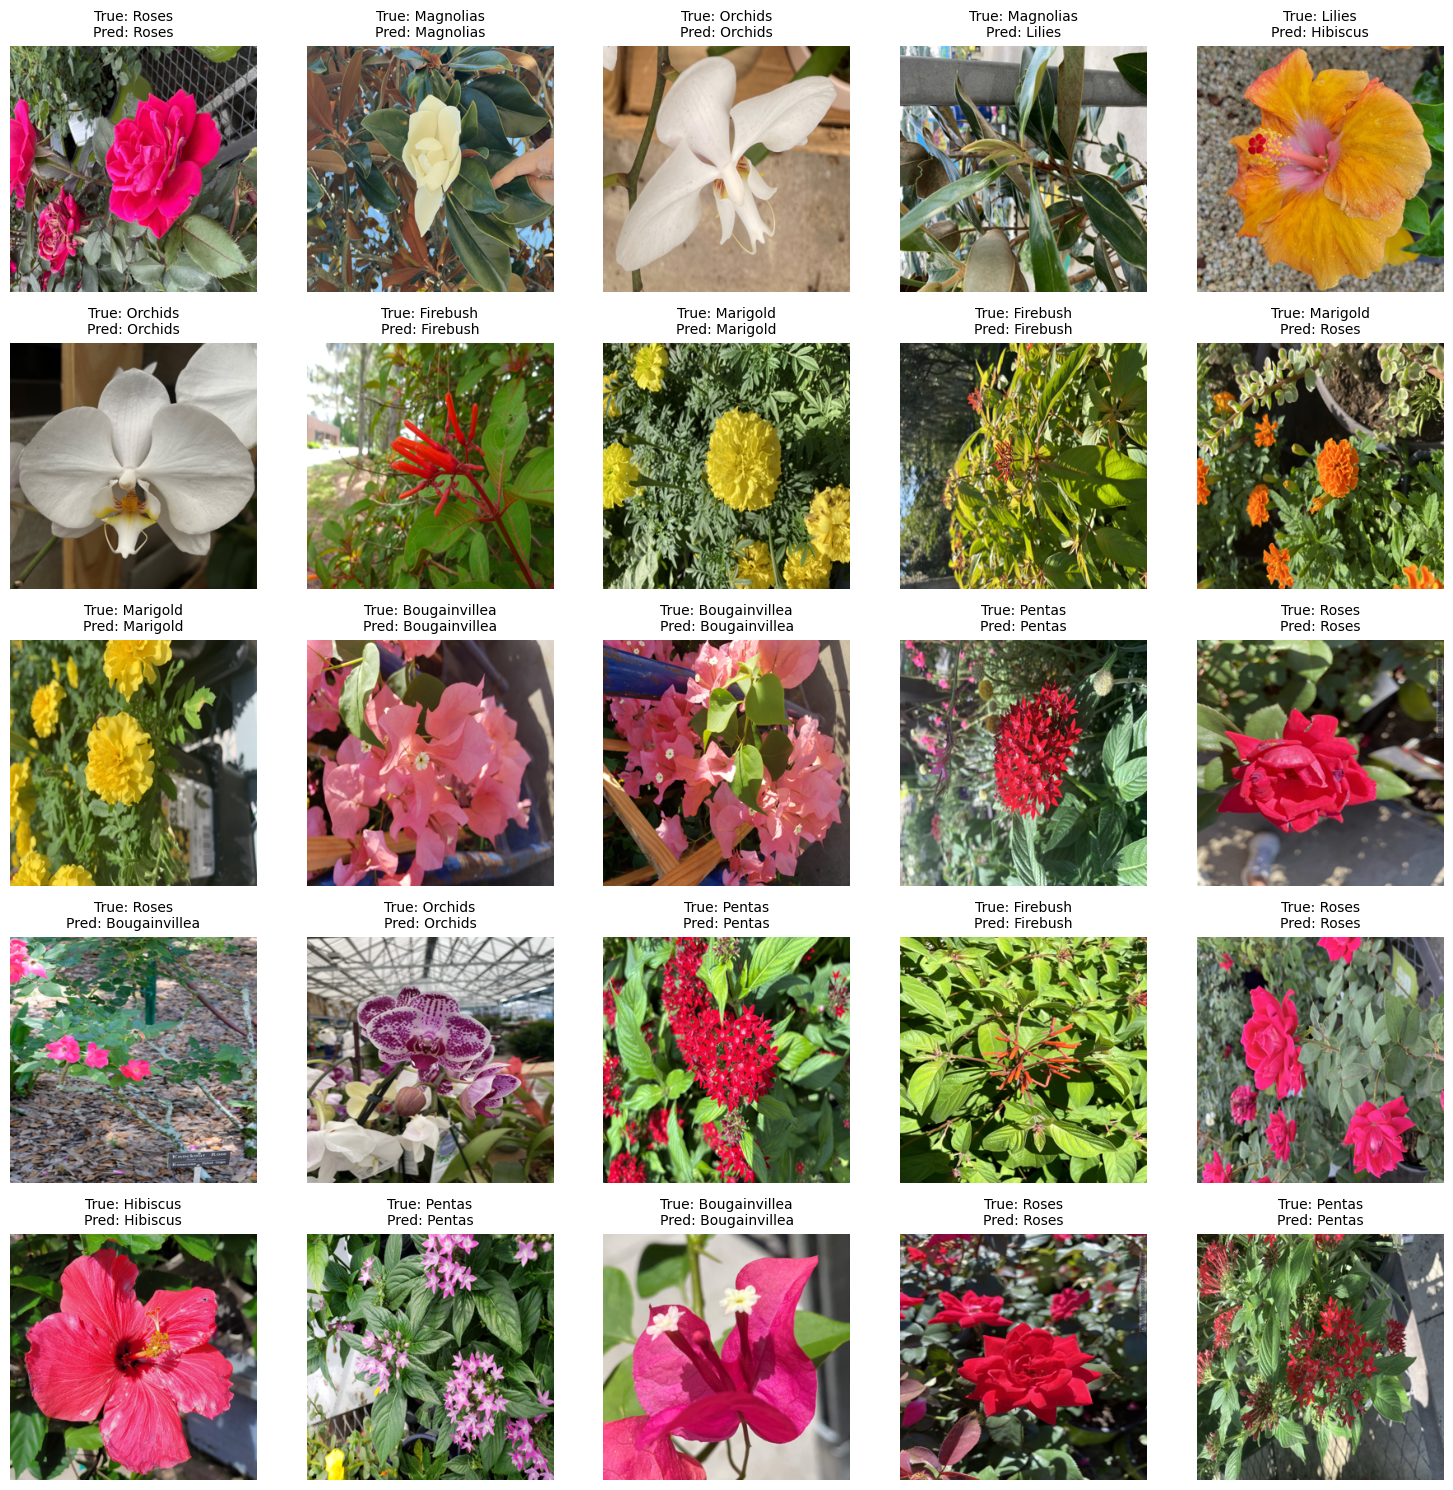

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Set the directory for the test dataset
test_data_path = 'flower_species_classification/'

# Load the test dataset
X_test = np.load(test_data_path + 'data_test.npy').T  # Transpose the data
y_test = np.load(test_data_path + 'labels_test.npy').astype(int)  # Convert to integers

# Normalize the test data (same as training data normalization)
X_test = X_test / 255.0

# Reshape the test data to (num_samples, 300, 300, 3)
X_test = X_test.reshape(-1, 300, 300, 3)

# Load the saved model
model = load_model('mobilenetv2_model_flower.h5')  # Ensure this matches the saved model file

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Class names for display (update if your classes differ)
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids',
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

# Visualize predictions
def visualize_predictions(images, true_labels, pred_labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        true_class = class_names[int(true_labels[i])]  # Convert to int here
        pred_class = class_names[int(pred_labels[i])]  # Convert to int here
        plt.title(f"True: {true_class}\nPred: {pred_class}", fontsize=10)
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_predictions(X_test, y_test, y_pred_classes, class_names, num_samples=25)


In [9]:
import os

# Path to the test images directory
test_images_dir = "car_detection_dataset/testing_images"

# List all test image files
test_image_paths = [os.path.join(test_images_dir, fname) for fname in os.listdir(test_images_dir) if fname.endswith(".jpg")]

# Print test image paths for verification
print("Test Image Paths:", test_image_paths)


Test Image Paths: ['car_detection_dataset/testing_images/vid_5_30040.jpg', 'car_detection_dataset/testing_images/vid_5_27500.jpg', 'car_detection_dataset/testing_images/vid_5_28380.jpg', 'car_detection_dataset/testing_images/vid_5_26420.jpg', 'car_detection_dataset/testing_images/vid_5_31160.jpg', 'car_detection_dataset/testing_images/vid_5_29840.jpg', 'car_detection_dataset/testing_images/vid_5_30120.jpg', 'car_detection_dataset/testing_images/vid_5_27460.jpg', 'car_detection_dataset/testing_images/vid_5_28020.jpg', 'car_detection_dataset/testing_images/vid_5_30860.jpg', 'car_detection_dataset/testing_images/vid_5_26780.jpg', 'car_detection_dataset/testing_images/vid_5_29100.jpg', 'car_detection_dataset/testing_images/vid_5_25100.jpg', 'car_detection_dataset/testing_images/vid_5_29060.jpg', 'car_detection_dataset/testing_images/vid_5_28340.jpg', 'car_detection_dataset/testing_images/vid_5_26580.jpg', 'car_detection_dataset/testing_images/vid_5_29880.jpg', 'car_detection_dataset/testin

In [10]:
def preprocess_test_image(image_path):
    """
    Preprocess a single test image:
    1. Load the image.
    2. Resize to (380, 676) (height, width).
    3. Normalize pixel values to [0, 1].
    """
    image = Image.open(image_path).resize((380, 676))  # Resize to (width, height) matching training shape
    image_array = np.array(image) / 255.0  # Normalize pixel values
    return image_array


In [11]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2

model = load_model('car_detection_model_1.keras')



In [12]:

# Get list of test image paths
test_image_paths = [os.path.join(test_images_dir, fname) for fname in os.listdir(test_images_dir) if fname.endswith(".jpg")]

# Preprocess all test images
test_images = [preprocess_test_image(path) for path in test_image_paths]
test_images = np.array(test_images).reshape(-1, 380, 676, 3)  # Ensure correct shape

# Verify the shape
print("Test images shape:", test_images.shape)  # Should be (num_samples, 380, 676, 3)

Test images shape: (175, 380, 676, 3)


In [13]:

predictions = model.predict(test_images)
print("Predicted Bounding Boxes (Normalized):", predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 419ms/step
Predicted Bounding Boxes (Normalized): [[0.43795723 0.53450364 0.606656   0.6578206 ]
 [0.5211809  0.62124026 0.74171907 0.7816026 ]
 [0.42991763 0.5267559  0.62647414 0.6569382 ]
 [0.476495   0.5737413  0.67843163 0.7204385 ]
 [0.52410644 0.6196674  0.7646397  0.78701353]
 [0.5078815  0.613063   0.6852055  0.7551429 ]
 [0.4813881  0.5794868  0.6324843  0.70694804]
 [0.5408159  0.64127606 0.78884375 0.8165479 ]
 [0.4363339  0.5265459  0.54569006 0.6312592 ]
 [0.54264843 0.64526826 0.809871   0.8222612 ]
 [0.518467   0.6177417  0.74139404 0.7747664 ]
 [0.47540686 0.5685802  0.6998602  0.7196402 ]
 [0.51158285 0.61239314 0.71448404 0.7639481 ]
 [0.46941045 0.56564933 0.6252955  0.69383836]
 [0.41834885 0.51903677 0.59932244 0.6402221 ]
 [0.46836805 0.5656596  0.6477154  0.70041037]
 [0.53315324 0.64419967 0.7446168  0.80094063]
 [0.4751468  0.569736   0.68219835 0.7146545 ]
 [0.5172834  0.6129849  0.75642395 0.7810904 ]
 [0.49604544 0.5955279  0.646

In [14]:

def denormalize_bboxes(predictions):
    """
    Denormalize bounding box predictions back to original image dimensions.
    """
    denormalized_bboxes = []
    for bbox in predictions:
        denormalized_bboxes.append([
            bbox[0] * 676,  # x_min
            bbox[1] * 380,  # y_min
            bbox[2] * 676,  # x_max
            bbox[3] * 380   # y_max
        ])
    return np.array(denormalized_bboxes).astype(int)

denormalized_predictions = denormalize_bboxes(predictions)
print("Predicted Bounding Boxes (Denormalized):", denormalized_predictions)

Predicted Bounding Boxes (Denormalized): [[296 203 410 249]
 [352 236 501 297]
 [290 200 423 249]
 [322 218 458 273]
 [354 235 516 299]
 [343 232 463 286]
 [325 220 427 268]
 [365 243 533 310]
 [294 200 368 239]
 [366 245 547 312]
 [350 234 501 294]
 [321 216 473 273]
 [345 232 482 290]
 [317 214 422 263]
 [282 197 405 243]
 [316 214 437 266]
 [360 244 503 304]
 [321 216 461 271]
 [349 232 511 296]
 [335 226 436 274]
 [314 214 422 263]
 [325 221 449 274]
 [319 211 458 268]
 [319 217 410 262]
 [334 227 433 276]
 [297 204 443 257]
 [326 222 418 267]
 [364 244 517 305]
 [278 191 381 234]
 [291 198 399 243]
 [348 233 518 297]
 [286 195 370 236]
 [290 198 376 239]
 [346 232 484 288]
 [279 192 382 234]
 [321 213 451 268]
 [246 166 355 207]
 [264 183 372 225]
 [310 211 462 265]
 [264 182 348 219]
 [277 190 401 236]
 [305 207 393 251]
 [296 201 397 245]
 [350 234 497 293]
 [341 226 502 290]
 [328 224 493 284]
 [281 195 394 240]
 [328 222 458 275]
 [339 229 510 291]
 [328 216 489 278]
 [362 244

In [15]:

def visualize_predictions(image_path, predicted_bbox):
    """
    Visualize the predicted bounding box on the image.
    """
    # Load the original image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (676, 380))  # Resize to match the model input dimensions

    # Draw the predicted bounding box
    cv2.rectangle(
        image,
        (predicted_bbox[0], predicted_bbox[1]),  # Top-left corner
        (predicted_bbox[2], predicted_bbox[3]),  # Bottom-right corner
        (255, 0, 0), 2  # Red color for predicted box
    )

    # Display the image with the bounding box
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Predicted Bounding Box (Red)")
    plt.axis('off')
    plt.show()

Visualizing predictions for car_detection_dataset/testing_images/vid_5_26580.jpg


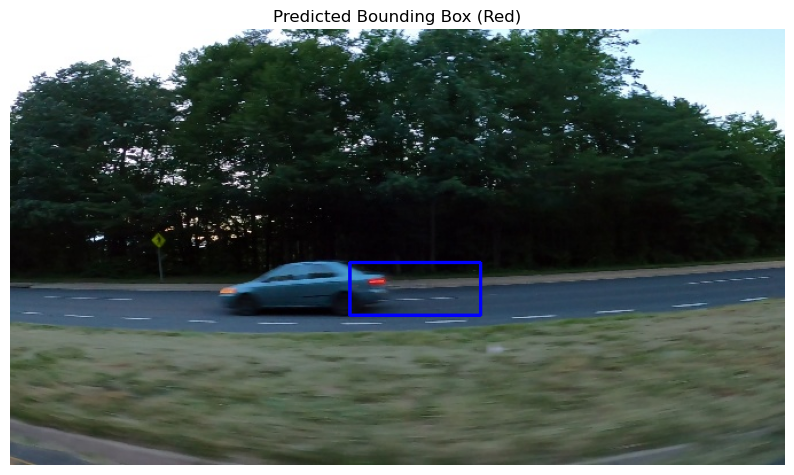

Visualizing predictions for car_detection_dataset/testing_images/vid_5_26620.jpg


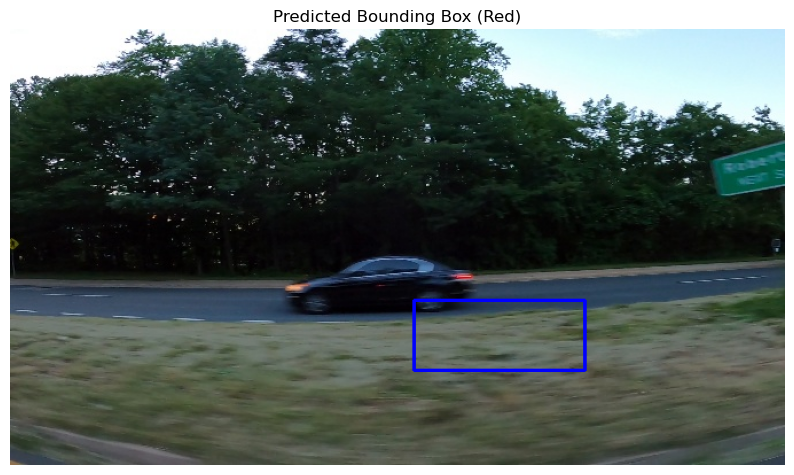

Visualizing predictions for car_detection_dataset/testing_images/vid_5_27920.jpg


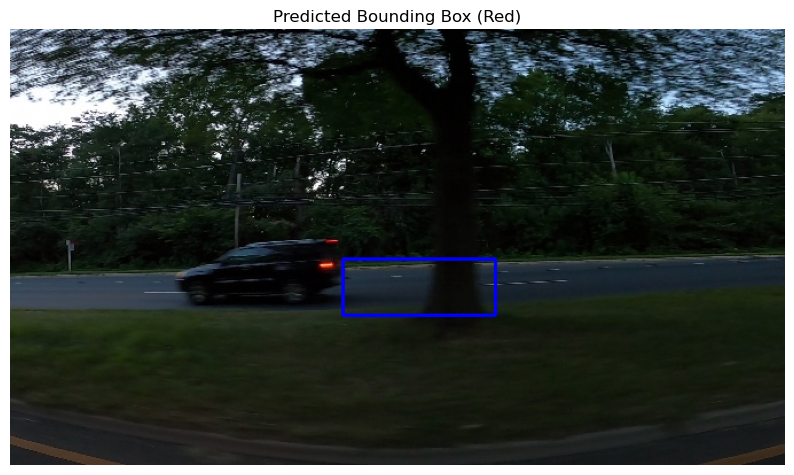

Visualizing predictions for car_detection_dataset/testing_images/vid_5_29460.jpg


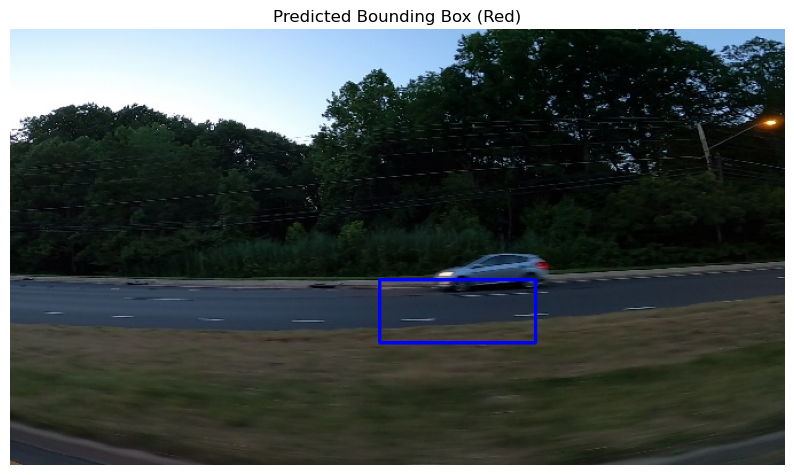

Visualizing predictions for car_detection_dataset/testing_images/vid_5_28520.jpg


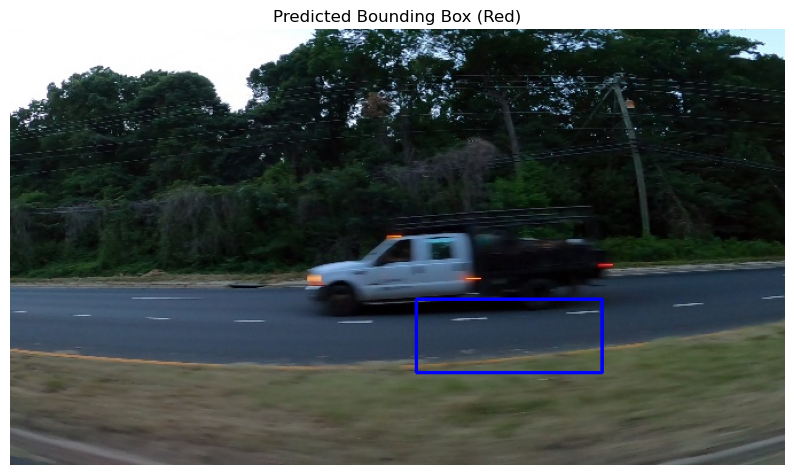

Visualizing predictions for car_detection_dataset/testing_images/vid_5_26900.jpg


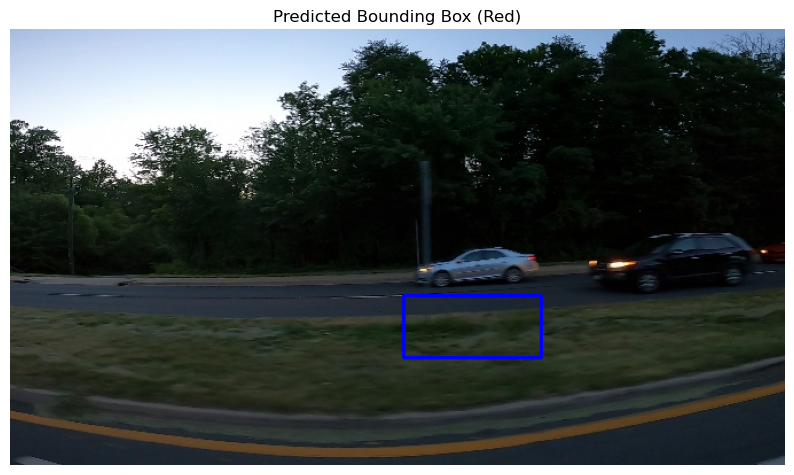

Visualizing predictions for car_detection_dataset/testing_images/vid_5_26940.jpg


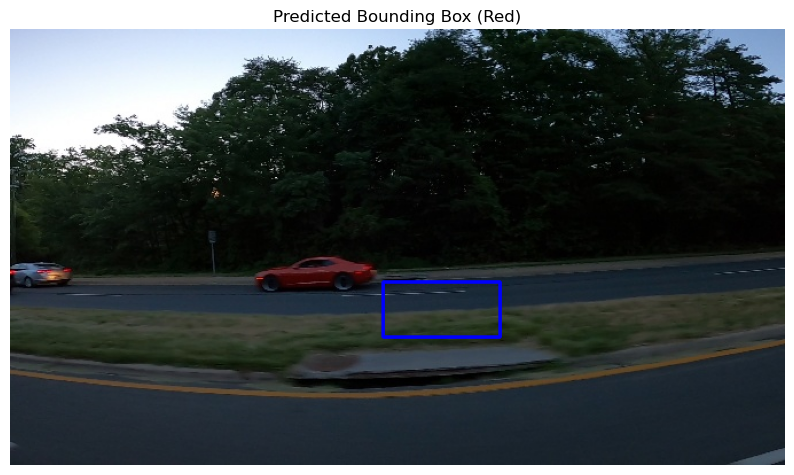

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the test image paths
test_image_paths = [
    "car_detection_dataset/testing_images/vid_5_26580.jpg",
    "car_detection_dataset/testing_images/vid_5_26620.jpg",
    "car_detection_dataset/testing_images/vid_5_27920.jpg",
    "car_detection_dataset/testing_images/vid_5_29460.jpg",
    "car_detection_dataset/testing_images/vid_5_28520.jpg",
    "car_detection_dataset/testing_images/vid_5_26900.jpg",
    "car_detection_dataset/testing_images/vid_5_26940.jpg"
]

# Visualize predictions for all test images
for idx, image_path in enumerate(test_image_paths):
    print(f"Visualizing predictions for {image_path}")
    visualize_predictions(image_path, denormalized_predictions[idx])

In [63]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "car_detection_model_1.keras"  # Adjust path if necessary
final_car_detection_model = load_model(model_path)

# Load annotations
annotation_file = "Labels_makesense.csv"  # Replace with the correct path
annotations = pd.read_csv(annotation_file)

print(annotations.columns)





Index(['label_name', 'bbox_x', 'bbox_y', 'bbox_width', 'bbox_height',
       'image_name', 'image_width', 'image_height'],
      dtype='object')


In [64]:
# Transform bounding boxes to [xmin, ymin, xmax, ymax]
def transform_bbox(df):
    """
    Convert bounding box format to [xmin, ymin, xmax, ymax].
    """
    df['xmin'] = df['bbox_x']
    df['ymin'] = df['bbox_y']
    df['xmax'] = df['bbox_x'] + df['bbox_width']
    df['ymax'] = df['bbox_y'] + df['bbox_height']
    return df[['image_name', 'xmin', 'ymin', 'xmax', 'ymax', 'image_width', 'image_height']]

annotations = transform_bbox(annotations)

In [65]:
# Preprocess test images
def preprocess_test_image(image_path, target_shape=(380, 676)):
    """
    Preprocess an image for validation.
    Args:
        image_path: Path to the image file.
        target_shape: Target shape for resizing the image.
    Returns:
        Preprocessed image as a NumPy array.
    """
    image = Image.open(image_path).resize(target_shape)
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image








In [67]:
image_folder = "car_detection_dataset/testing_images"  # Replace with the correct path
annotations['image_path'] = annotations['image_name'].apply(lambda x: os.path.join(image_folder, x))

# Preprocess all test images
test_images = np.array([preprocess_test_image(path) for path in annotations['image_path']])

# Normalize bounding boxes
annotations['xmin_norm'] = annotations['xmin'] / annotations['image_width']
annotations['xmax_norm'] = annotations['xmax'] / annotations['image_width']
annotations['ymin_norm'] = annotations['ymin'] / annotations['image_height']
annotations['ymax_norm'] = annotations['ymax'] / annotations['image_height']
test_bboxes = annotations[['xmin_norm', 'ymin_norm', 'xmax_norm', 'ymax_norm']].to_numpy()

# Predict bounding boxes
predicted_bboxes = final_car_detection_model.predict(test_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step


In [68]:
# Denormalize predicted bounding boxes
def denormalize_bboxes(predictions, width, height):
    """
    Denormalize bounding boxes to original dimensions.
    """
    denormalized = []
    for pred in predictions:
        denormalized.append([
            pred[0] * width,
            pred[1] * height,
            pred[2] * width,
            pred[3] * height
        ])
    return np.array(denormalized)

denormalized_bboxes = denormalize_bboxes(predicted_bboxes, annotations['image_width'].iloc[0], annotations['image_height'].iloc[0])


In [82]:
# Compute IoU
def compute_iou(pred_box, true_box):
    """
    Compute Intersection over Union (IoU) for bounding boxes.
    """
    x_min_inter = max(pred_box[0], true_box[0])
    y_min_inter = max(pred_box[1], true_box[1])
    x_max_inter = min(pred_box[2], true_box[2])
    y_max_inter = min(pred_box[3], true_box[3])
    
    intersection = max(0, x_max_inter - x_min_inter) * max(0, y_max_inter - y_min_inter)
    pred_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    true_area = (true_box[2] - true_box[0]) * (true_box[3] - true_box[1])
    union = pred_area + true_area - intersection
    return intersection / union if union > 0 else 0

# Validate predictions
ious = [compute_iou(pred, true) for pred, true in zip(denormalized_bboxes, annotations[['xmin', 'ymin', 'xmax', 'ymax']].to_numpy())]
average_iou = np.mean(ious)

print(f"Average IoU on test set: {average_iou:.2f}")

Average IoU on test set: 0.02


In [70]:

# Evaluate no-car images
def is_no_car(predicted_bbox, threshold=0.1):
    """
    Check if a predicted bounding box corresponds to a no-car scenario.
    """
    return np.allclose(predicted_bbox, [0, 0, 0, 0], atol=threshold)

# Example: Evaluate no-car images
no_car_annotations = annotations[(annotations['xmin'] == 0) & (annotations['ymin'] == 0) & (annotations['xmax'] == 0) & (annotations['ymax'] == 0)]
correct_no_car_predictions = 0

for _, row in no_car_annotations.iterrows():
    image = preprocess_test_image(row['image_path'])
    pred_bbox = final_car_detection_model.predict(image[np.newaxis, ...])[0]
    if is_no_car(pred_bbox):
        correct_no_car_predictions += 1

no_car_accuracy = correct_no_car_predictions / len(no_car_annotations)
print(f"No-car detection accuracy: {no_car_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
No-car detection accuracy: 0.00%


**Prediction using YOLO**

In [84]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.1/899.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 12.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [85]:
from ultralytics import YOLO

# Load the pre-trained YOLO model
model = YOLO("yolov8n.pt")  # You can replace "yolov8n.pt" with "yolov8s.pt" or "yolov8m.pt"


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/varunvemuri/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 11.8MB/s]


In [86]:
import cv2
import matplotlib.pyplot as plt

def run_yolo_inference(image_path):
    # Predict with YOLO
    results = model(image_path)  # Inference on the image

    # Display results
    for result in results:
        # Plot predictions
        result.plot()
        plt.show()

# Example: Predict on a single test image
run_yolo_inference("car_detection_dataset/testing_images/vid_5_26580.jpg")



image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26580.jpg: 384x640 1 car, 31.5ms
Speed: 1.7ms preprocess, 31.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


In [87]:
def process_yolo_predictions(results, classes_to_detect=['car']):
    """
    Process YOLO predictions and filter for specified classes.
    """
    predictions = []
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        confs = result.boxes.conf.cpu().numpy()  # Confidence scores
        class_ids = result.boxes.cls.cpu().numpy()  # Class IDs
        
        for box, conf, class_id in zip(boxes, confs, class_ids):
            class_name = model.names[int(class_id)]
            if class_name in classes_to_detect:
                predictions.append({"class": class_name, "confidence": conf, "bbox": box})
    
    return predictions



image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26580.jpg: 384x640 1 car, 37.7ms
Speed: 0.8ms preprocess, 37.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


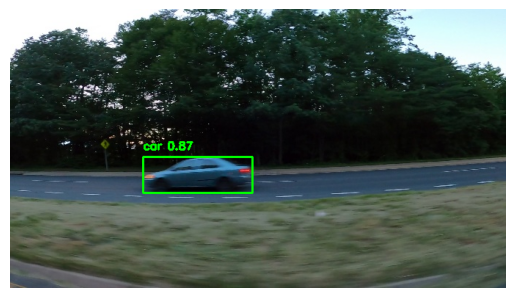

In [89]:
def visualize_yolo_predictions(image_path, predictions):
    # Load image
    img = cv2.imread(image_path)
    for pred in predictions:
        x_min, y_min, x_max, y_max = map(int, pred["bbox"])
        confidence = pred["confidence"]
        class_name = pred["class"]
        
        # Draw bounding box
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        cv2.putText(img, f"{class_name} {confidence:.2f}", (x_min, y_min - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example: Run and visualize predictions
image_path = "car_detection_dataset/testing_images/vid_5_26580.jpg"
results = model(image_path)
predictions = process_yolo_predictions(results)
visualize_yolo_predictions(image_path, predictions)


In [94]:
if len(predictions) == 0:
    print("No car detected in the image.")



image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26580.jpg: 384x640 1 car, 53.3ms
Speed: 5.3ms preprocess, 53.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Predictions for car_detection_dataset/testing_images/vid_5_26580.jpg: [{'class': 'car', 'confidence': 0.8711668, 'bbox': array([     181.82,      201.71,      330.41,      250.48], dtype=float32)}]


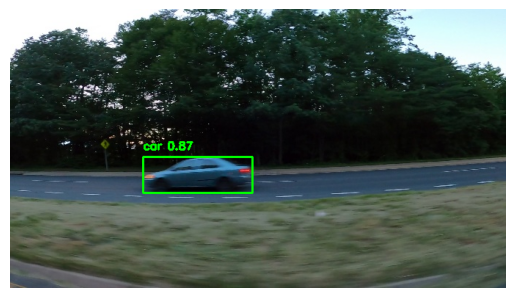


image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_26620.jpg: 384x640 1 car, 47.6ms
Speed: 1.0ms preprocess, 47.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Predictions for car_detection_dataset/testing_images/vid_5_26620.jpg: [{'class': 'car', 'confidence': 0.8534542, 'bbox': array([     237.93,      197.94,      405.72,      248.57], dtype=float32)}]


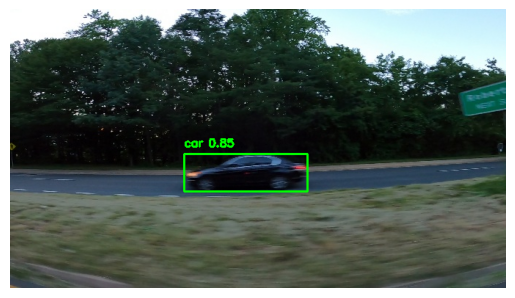


image 1/1 /Users/varunvemuri/Downloads/ML_Project3/car_detection_dataset/testing_images/vid_5_27920.jpg: 384x640 1 car, 43.8ms
Speed: 1.0ms preprocess, 43.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Predictions for car_detection_dataset/testing_images/vid_5_27920.jpg: [{'class': 'car', 'confidence': 0.8786383, 'bbox': array([     145.07,      182.41,      291.57,      241.36], dtype=float32)}]


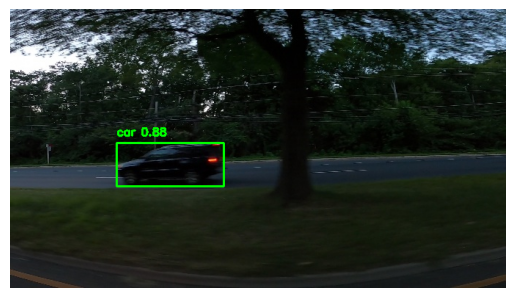

In [96]:
test_image_paths = [
    "car_detection_dataset/testing_images/vid_5_26580.jpg",
    "car_detection_dataset/testing_images/vid_5_26620.jpg",
    "car_detection_dataset/testing_images/vid_5_27920.jpg"
]

for image_path in test_image_paths:
    results = model(image_path)
    predictions = process_yolo_predictions(results)
    print(f"Predictions for {image_path}: {predictions}")
    visualize_yolo_predictions(image_path, predictions)
